In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
rides = pd.read_csv('Bike_Sharing_hour.csv')
rides

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


# Checking out the data (Steps 1-4 Prepare the data)

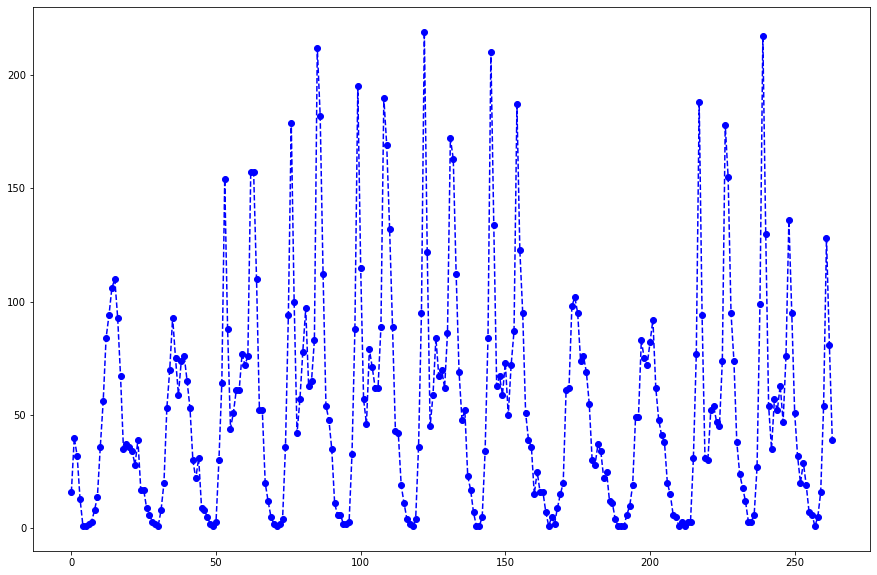

In [3]:
#  number of riders for each hour of each day from January 1, 2011 to 
#  December 31, 2012

fig = plt.figure(figsize=(15, 10))
number= np.arange(24*11) # This is the first  11 days (every hour data x 24)
plt.plot(number,rides[:24*11]['cnt'] , 'bo--') 

In [4]:
# one-hot encoding of categorical data

dummy_fields = ['season', 'weathersit', 'mnth', 'hr', 'weekday']
for each in dummy_fields:
    dummies = pd.get_dummies(rides[each], prefix=each, drop_first=False)
    rides = pd.concat([rides, dummies], axis=1)

fields_to_drop = ['instant', 'dteday', 'season', 'weathersit', 
                  'weekday', 'atemp', 'mnth', 'workingday', 'hr']
data = rides.drop(fields_to_drop, axis=1)
data.head(100)

,yr,holiday,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0.24,0.81,0.0000,3,13,16,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0.22,0.80,0.0000,8,32,40,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0.22,0.80,0.0000,5,27,32,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0.24,0.75,0.0000,3,10,13,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0.24,0.75,0.0000,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0.24,0.48,0.2239,0,2,2,1,0,...,0,0,0,0,0,0,1,0,0,0
96,0,0,0.22,0.47,0.1642,0,3,3,1,0,...,0,0,0,0,0,0,1,0,0,0
97,0,0,0.20,0.47,0.2239,0,33,33,1,0,...,0,0,0,0,0,0,1,0,0,0
98,0,0,0.18,0.43,0.1940,1,87,88,1,0,...,0,0,0,0,0,0,1,0,0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 59 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            17379 non-null  int64  
 1   holiday       17379 non-null  int64  
 2   temp          17379 non-null  float64
 3   hum           17379 non-null  float64
 4   windspeed     17379 non-null  float64
 5   casual        17379 non-null  int64  
 6   registered    17379 non-null  int64  
 7   cnt           17379 non-null  int64  
 8   season_1      17379 non-null  uint8  
 9   season_2      17379 non-null  uint8  
 10  season_3      17379 non-null  uint8  
 11  season_4      17379 non-null  uint8  
 12  weathersit_1  17379 non-null  uint8  
 13  weathersit_2  17379 non-null  uint8  
 14  weathersit_3  17379 non-null  uint8  
 15  weathersit_4  17379 non-null  uint8  
 16  mnth_1        17379 non-null  uint8  
 17  mnth_2        17379 non-null  uint8  
 18  mnth_3        17379 non-nu

# 7-in-1 Auto-ML Implementation

<b>Cross-Validation Strategy</b>: Monte-Carlo / Repeated Random Subsampling Cross Validation (20 trials)

In [8]:
Number_trials=20

def train_knn(X, y):
    score_train = []
    score_test = []

    for seed in range(Number_trials):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)
        
        ### scale vars with MinMaxScaler()
#         scaler = MinMaxScaler()
#         X_train = scaler.fit_transform(X_train) # scale train set on the basis of the training data
#         X_test = scaler.transform(X_test) # scale test set on the basis of the training data
        
        neighbors_settings = range(1,50)
        acc_train = []
        acc_test = []

        for n_neighbors in neighbors_settings:   
            clf = KNeighborsRegressor(n_neighbors=n_neighbors) # build the model 
            clf.fit(X_train, y_train)    
            acc_train.append(clf.score(X_train, y_train))
            acc_test.append(clf.score(X_test, y_test))

        score_train.append(acc_train)
        score_test.append(acc_test)   
        
    score = np.mean(score_test, axis=0)
    run_time = (time.time() - start_time)
    return ['kNN Regression', np.amax(score), 'N_Neighbor = {0}'.format(np.argmax(score)+1), 'NA',run_time]

def train_linear_reg(X, y, reg=None):
    alpha_settings = [1e-5, 1e-4, 1e-3, 7e-3, 1e-2, 5e-2, 0.1, 0.2, 0.4, 0.75, 1, 1.5, 3, 10]
    #C = [.01, .1]
    score_train = []
    score_test = []
    weighted_coefs=[]
    
    for seed in range(Number_trials):
        training_accuracy = []  
        test_accuracy = []
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)
        
        ### scale vars with MinMaxScaler()
#         scaler = MinMaxScaler()
#         X_train = scaler.fit_transform(X_train) # scale train set on the basis of the training data
#         X_test = scaler.transform(X_test) # scale test set on the basis of the training data

        for k in alpha_settings:
            if reg == 'l1':
                lr = Lasso(alpha=k, max_iter=1000000).fit(X_train, y_train)
            if reg == 'l2':
                lr = Ridge(alpha=k, max_iter=1000000).fit(X_train, y_train)
            if reg == None:
                reg = 'No'
                lr = LinearRegression().fit(X_train, y_train)
            training_accuracy.append(lr.score(X_train, y_train))
            test_accuracy.append(lr.score(X_test, y_test))
            coefs=lr.coef_ 
            weighted_coefs.append(coefs) #append all the computed coefficients per trial
                
        score_train.append(training_accuracy)
        score_test.append(test_accuracy)
    
    mean_coefs=np.mean(weighted_coefs, axis=0) #get the mean of the weighted coefficients over all the trials 
    #print(mean_coefs) 
    score = np.mean(score_test, axis=0)
    
    #Plot the weight of the parameters 
    top_predictor=X.columns[np.argmax(np.abs(mean_coefs))]
    abs_mean_coefs = np.abs(mean_coefs[0,:])
    coefs_count = len(abs_mean_coefs)
    fig, ax = plt.subplots(figsize=(3,7))
    ax.barh(np.arange(coefs_count), sorted(abs_mean_coefs))
     
    ax.set_yticks(np.arange(coefs_count))
    ax.set_yticklabels(X.columns[np.argsort(abs_mean_coefs)])
    
    run_time = (time.time() - start_time)
    return ['Linear Regression - {0} Regularization'.format(reg), np.amax(score), \
            'C = {0}'.format(C[np.argmax(score)]), top_predictor, run_time]

def train_decision_tree(X, y):
    score_train = []
    score_test = []
    weighted_coefs = []
    maxdepth_settings = range(1, 50)

    for seed in range(Number_trials):
        training_accuracy = []
        test_accuracy = []
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)

        for depth in maxdepth_settings:   
            tree = DecisionTreeRegressor(max_depth=depth)  # build the model
            tree.fit(X_train, y_train)

            training_accuracy.append(tree.score(X_train, y_train)) # record training set accuracy
            test_accuracy.append(tree.score(X_test, y_test))  

            coefs = tree.feature_importances_
            weighted_coefs.append(coefs)
        
        score_train.append(training_accuracy)
        score_test.append(test_accuracy)
    
    mean_coefs = np.mean(weighted_coefs, axis=0) #get the mean of the weighted coefficients over all the trials       
    score = np.mean(score_test, axis=0)
    
    top_predictor=X.columns[np.argmax(np.abs(mean_coefs))]
    abs_mean_coefs = np.abs(mean_coefs[:])
    coefs_count = len(abs_mean_coefs)
    fig, ax = plt.subplots(figsize=(3,7))
    ax.barh(np.arange(coefs_count), sorted(abs_mean_coefs))
        
    ax.set_yticks(np.arange(coefs_count))
    ax.set_yticklabels(X.columns[np.argsort(abs_mean_coefs)])
    
    run_time = (time.time() - start_time)
    return ['Decision Tree Regression', np.amax(score), \
            'Max_depth = {0}'.format(max_features_tuning[np.argmax(score)]), top_predictor, run_time]

def train_RF(X, y):
    max_features_tuning=[0.1, .2, .3, .4, .5, .7, .8]
    #C = [.01, .1]
    score_train = []
    score_test = []
    weighted_coefs=[]
    
    for seed in range(Number_trials):
        training_accuracy = []  
        test_accuracy = []
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)
        for max_features_run in max_features_tuning:
            rf = RandomForestRegressor(n_estimators=100, max_features=max_features_run).fit(X_train, y_train)
            training_accuracy.append(rf.score(X_train, y_train))
            test_accuracy.append(rf.score(X_test, y_test))
           # if alpha_run == 0.01:
            coefs = rf.feature_importances_
            weighted_coefs.append(coefs)
                
        score_train.append(training_accuracy)
        score_test.append(test_accuracy)
 

    mean_coefs=np.mean(weighted_coefs, axis=0) #get the mean of the weighted coefficients over all the trials       
    score = np.mean(score_test, axis=0)
    
    top_predictor=X.columns[np.argmax(np.abs(mean_coefs))]
    abs_mean_coefs = np.abs(mean_coefs[:])
    coefs_count = len(abs_mean_coefs)
    fig, ax = plt.subplots(figsize=(3,7))
    ax.barh(np.arange(coefs_count), sorted(abs_mean_coefs))
        
    ax.set_yticks(np.arange(coefs_count))
    ax.set_yticklabels(X.columns[np.argsort(abs_mean_coefs)])
    
    run_time = (time.time() - start_time)
    return ['Random Forest Regression', np.amax(score), \
            'Max_features = {0}'.format(max_features_tuning[np.argmax(score)]), top_predictor,run_time]

def train_GBM(X, y):
    max_features_tuning=[0.1, .2, .3, .4, .5, .7, .8]
    #C = [.01, .1]
    score_train = []
    score_test = []
    weighted_coefs=[]
    
    for seed in range(Number_trials):
        training_accuracy = []  
        test_accuracy = []
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)
        for max_features_run in max_features_tuning:
            svc = GradientBoostingRegressor(n_estimators=100,max_depth=3, max_features=max_features_run).fit(X_train, y_train)
            training_accuracy.append(svc.score(X_train, y_train))
            test_accuracy.append(svc.score(X_test, y_test))
           # if alpha_run == 0.01:
            coefs = svc.feature_importances_
            weighted_coefs.append(coefs)
                
        score_train.append(training_accuracy)
        score_test.append(test_accuracy)
 

    mean_coefs=np.mean(weighted_coefs, axis=0) #get the mean of the weighted coefficients over all the trials       
    score = np.mean(score_test, axis=0)
    
    top_predictor=X.columns[np.argmax(np.abs(mean_coefs))]
    abs_mean_coefs = np.abs(mean_coefs[:])
    coefs_count = len(abs_mean_coefs)
    fig, ax = plt.subplots(figsize=(3,7))
    ax.barh(np.arange(coefs_count), sorted(abs_mean_coefs))
        
    ax.set_yticks(np.arange(coefs_count))
    ax.set_yticklabels(X.columns[np.argsort(abs_mean_coefs)])
    
    run_time = (time.time() - start_time)
    return ['Gradient Boosting Method', np.amax(score), \
            'Max_features = {0}'.format(max_features_tuning[np.argmax(score)]), top_predictor,run_time]

In [9]:
X = data.drop(['cnt', 'casual', 'registered'], axis=1).head(100)
X

,yr,holiday,temp,hum,windspeed,season_1,season_2,season_3,season_4,weathersit_1,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0.24,0.81,0.0000,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0.22,0.80,0.0000,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0.22,0.80,0.0000,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0.24,0.75,0.0000,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0.24,0.75,0.0000,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0.24,0.48,0.2239,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
96,0,0,0.22,0.47,0.1642,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
97,0,0,0.20,0.47,0.2239,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
98,0,0,0.18,0.43,0.1940,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [10]:
y = data['cnt'].head(100)
y

0      16
1      40
2      32
3      13
4       1
     ... 
95      2
96      3
97     33
98     88
99    195
Name: cnt, Length: 100, dtype: int64

In [ ]:
#### run of the 7-in-1 Auto-ML

X = data.drop(['cnt', 'casual', 'registered'], axis=1)
y = data['cnt']

import time

start_time = time.time()
a = train_knn(X,y)
print(a)
print("%s seconds" % a[4])

start_time = time.time()
b = train_linear_reg(X,y)
print(b)
print("%s seconds" % b[4])

start_time = time.time()
c = train_linear_reg(X,y,reg='L1')
print(c)
print("%s seconds" % c[4])

start_time = time.time()
d = train_linear_reg(X,y,reg='L2')
print(d)
print("%s seconds" % d[4])

start_time = time.time()
e = train_decision_tree(X,y)
print(e)
print("%s seconds" % e[4])

start_time = time.time()
f = train_RF(X,y)
print(f)
print("%s seconds" % f[4])

start_time = time.time()
g = train_GBM(X,y)
print(g)
print("%s seconds" % f[4])

In [ ]:
cols = ['Machine Learning Method', 'Test Accuracy', 'Best Parameter', 'Top Predictor Variable', 'Run Time']
df2 = pd.DataFrame(columns=cols)

df2.loc[0] = a
df2.loc[1] = b
df2.loc[2] = c
df2.loc[3] = d
df2.loc[4] = e
df2.loc[5] = f
df2.loc[6] = g

df2